# Clustering

In this notebook, we will use clustering algorithms from scikit learn to cluster the data. As usual, we will also make use of the `pandas`, `numpy`, `matplotlib` and `seaborn`. Let's import the necessary libraries. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Part I: Working with simulated data

To understand how a method work, it is often a good idea to start with simulated data. Scikit-learn provides a number of functions to generate simulated data. We will use the `make_blobs` function to generate some data. This allows to control how close the cluster centers are and hence how easy or difficult it is to separate the clusters.
We generate 3 dataset. One very easy, one medium and one hard. 


In [4]:
from sklearn.datasets import make_blobs

# this function creats a datawframe with 4 clusters. The points in each cluster are normally distributed around the center of the cluster
# A larger standdard deviation (stddev) will mean that the points are more spread out and hence clustering is harder
def create_clusterdata(stddev):

    X1_1, y1_1 = make_blobs(n_samples=50, centers=[[0, 0]], cluster_std=stddev, random_state=1)
    X1_2, y1_2 = make_blobs(n_samples=50, centers=[[12, 0]], cluster_std=stddev, random_state=1)

    # Create two other clusters next to each other
    X2_1, y2_1 = make_blobs(n_samples=50, centers=[[20, 25]], cluster_std=stddev, random_state=1)
    X2_2, y2_2 = make_blobs(n_samples=50, centers=[[-5, 20]], cluster_std=stddev, random_state=1)

    # Combine all the clusters and write them as a data frame
    X = np.vstack([X1_1, X1_2, X2_1, X2_2])
    return pd.DataFrame({"x1": X[:,0], "x2": X[:,1]})

# a dataset with medium spread
cluster_data = create_clusterdata(3.0)

# a very easy dataset
easy_cluster_data = create_clusterdata(1.0)

# a very hard dataset
hard_cluster_data = create_clusterdata(7.0)


Let's now visualize the data. As the data is 2D, we can plot it on a scatter plot.

<Axes: xlabel='x1', ylabel='x2'>

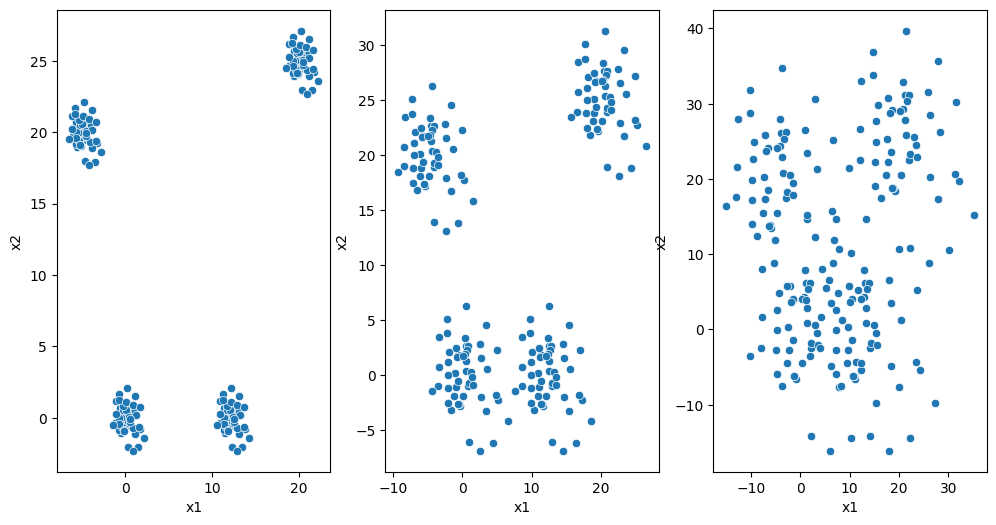

In [5]:
# let's plot the three datasets
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
sns.scatterplot(x='x1', y='x2', data=easy_cluster_data, ax=axs[0])
sns.scatterplot(x='x1', y='x2', data=cluster_data, ax=axs[1])
sns.scatterplot(x='x1', y='x2', data=hard_cluster_data, ax=axs[2])

We see that the two variables are roughly on the same scale. Hence we do not need to standardize the data.

## Hierarchical clustering

We start with hierarchical clustering. Before we do the actual clustering, we plot a dendrogram. As a linkage criterion, we use the `ward` criterion.
Note that the dendrogram is imported from `scipy.cluster.hierarchy` and not from `scikit-learn`. Scikit-learn does not provide a function to plot the dendrogram. 

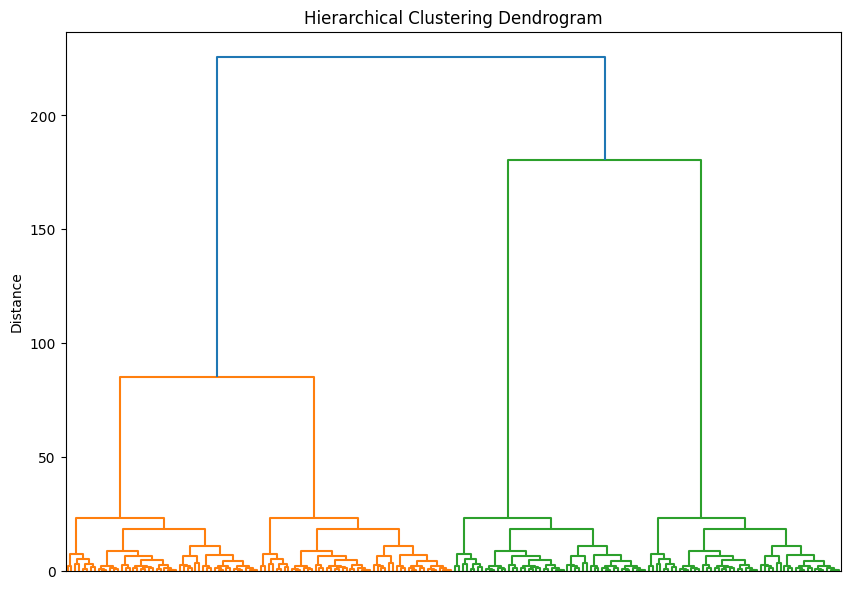

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram


# Hierarchical clustering
# Calculate the linkage matrix
Z = linkage(cluster_data, method='ward')


# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, no_labels=True, orientation='top', color_threshold=200)
plt.title('Hierarchical Clustering Dendrogram')

plt.ylabel('Distance')
plt.show()



### Exercise

- Can you recognize the structure of the data in the dendrogram?
- How do you choose the color threshold such that you see 2 clusters? How about 4 clusters?
- Which points are clustered together if you choose only 2 clusters? How does it change if you use `single` instead of `ward`?

Now let's do the actual clustering, which we can do using scikit learns AgglomerativeClustering class. 

In [7]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(linkage = 'ward', n_clusters=2)
clusters = agglo.fit_predict(cluster_data)

We can visualize the clustering by coloring the points according to the cluster they belong to.

<Axes: xlabel='x1', ylabel='x2'>

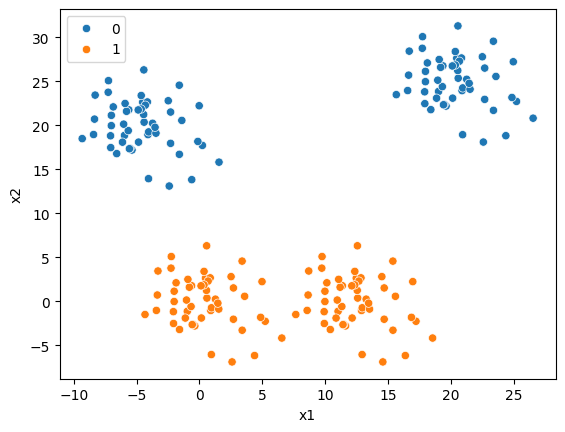

In [8]:

sns.scatterplot(x = "x1", y = "x2", hue=clusters, data = cluster_data)

### Exercise

- How do the clusters change if you use `single` instead of `ward`? Is it consistent with the dendrogram?
- What happens if you choose 3 clusters? How about 5 clusters?

### K-Means clustering

Next we cluster the data using K-means. We already have a good idea that there are 4 clusters. Hence we set `n_clusters` to 4.

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,  n_init=40)
clusters = kmeans.fit_predict(cluster_data)

Exception in thread Thread-11 (_readerthread):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\marce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\encodings\cp1252.py", line 23, in decode
 

<Axes: xlabel='x1', ylabel='x2'>

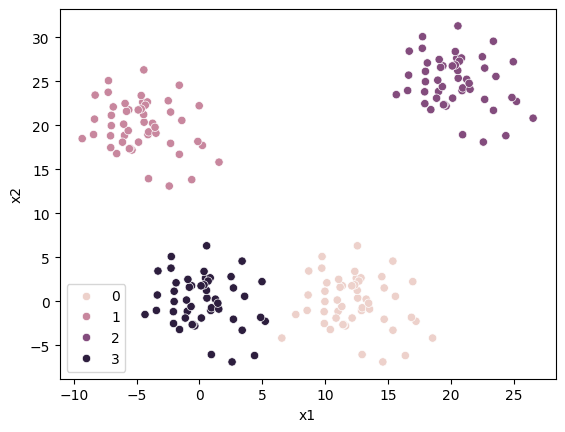

In [10]:

sns.scatterplot(x = "x1", y = "x2", hue=clusters, data = cluster_data)

- Do you get exactly the same solution every time you run the algorithm? 
- What happens if you set `n_init` to one and run the algorithm multiple times? Why?

## Finding number of clusters and assessing robustness

### Finding the optimal number of clusters

The following code implements the elbow heuristic to find the number of clusters. It computes the inertia for different values of `k` and plots the inertia as a function of `k`.
the inertia (total within cluster sum of squares).

<Axes: xlabel='n_clusters', ylabel='inertia'>

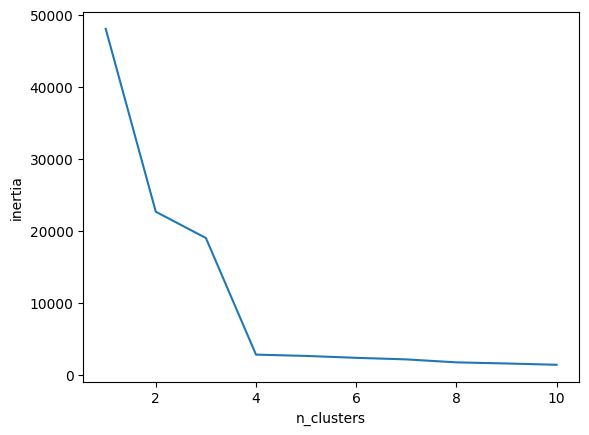

In [45]:

# K-means clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto")
    kmeans.fit(cluster_data)
    inertia.append(kmeans.inertia_)

ellbow_df = pd.DataFrame({'n_clusters': range(1, 11), 'inertia': inertia})
sns.lineplot(x="n_clusters", y="inertia", data = ellbow_df)

### Exercise
- Do the same for the easy and hard dataset. What do you observe?

### Assessing quality and robustness

In order to assess the quality of the clustering, we can use the silhouette score. The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 

<Axes: xlabel='x1', ylabel='x2'>

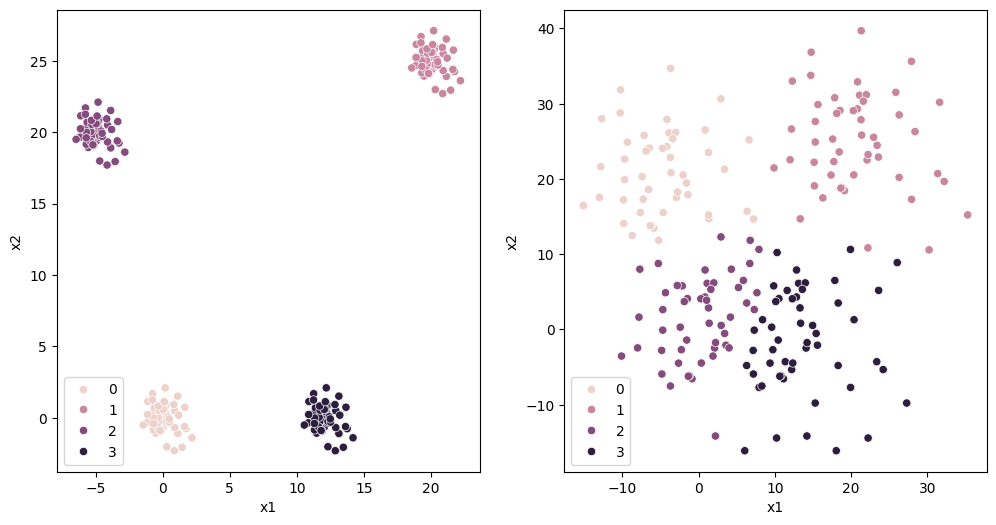

In [12]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=4,  n_init=40)
clusters_easy = kmeans1.fit_predict(easy_cluster_data)
kmeans2 = KMeans(n_clusters=4,  n_init=40)
clusters_hard = kmeans2.fit_predict(hard_cluster_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x = "x1", y = "x2", hue=clusters_easy, data = easy_cluster_data, ax=axs[0])
sns.scatterplot(x = "x1", y = "x2", hue=clusters_hard, data = hard_cluster_data, ax = axs[1])

In [13]:
# compute the silhouette score
from sklearn.metrics import silhouette_score

print("silhouette score easy problem", silhouette_score(easy_cluster_data, clusters_easy)) 
print("silhouette score hard problem", silhouette_score(hard_cluster_data, clusters_hard))


silhouette score easy problem 0.8997063547134186
silhouette score hard problem 0.44403475168688916


We can clearly see that the silhouette score for the data that is easy to cluster is much higher. 

### Exercise
- What would happen if you change the number of clusters to 2 or 3? Will you still see such a difference in the silhouette score?

Let's now check how robust our clustering is. We use the following procedure (originally describe [here](https://idp.springer.com/authorize/casa?redirect_uri=https://link.springer.com/article/10.1007/s11002-009-9083-4&casa_token=ZA-aJfEMvrUAAAAA:QXQlQ687cUuT81GXB_lDZqAtrcT05xtYK7-oTT0FsAb5kDmrUI3AjgYqlflCMbj4pgKvjeoSejhQnoHP5sk)):
1. We choose two sets of bootstrap samples and train K-Means for each. 
2. We predict the labels of the original data and compute how well the predicted clusters match for the 
two independently trained models. For this, we use the adjusted rand index.
3. We plot the result as a histogram. If it is a good clustering, we should see values close to 1.


<Axes: ylabel='Count'>

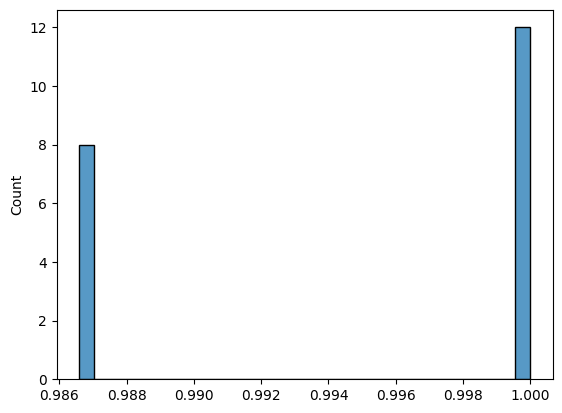

In [14]:
# produce bootstrap samples for the silhouette score
from sklearn.metrics import adjusted_rand_score

ari_scores = []
for i in range(20):
    bootstrap_sample_1 = cluster_data.sample(replace=True, n=len(cluster_data))
    km1 = KMeans(n_clusters=4, n_init=40)
    km1.fit(bootstrap_sample_1)
    labels1 = km1.predict(cluster_data)

    bootstrap_sample_2 = cluster_data.sample(replace=True, n=len(cluster_data))
    km2 = KMeans(n_clusters=4, n_init=40)
    km2.fit(bootstrap_sample_2)
    labels2 = km2.predict(cluster_data)

    ari = adjusted_rand_score(labels1, labels2)
    ari_scores.append(ari)

# plot the distribution of ari scores
sns.histplot(ari_scores, bins=30)

#### Exercise 
- What happens if you change the number of clusters to something different than 4?

## Working with Palmer's penguins

If you have time, you can also try to cluster the Palmer's penguins dataset. For your convenience, we help you with the data preprocessing.

First we load the data. As in clustering we do not need the species, we drop this column. We keep it for later use to check the quality of the clustering.

In [33]:
penguin_data = pd.read_csv("penguins-numeric-all.csv", index_col=0)
species = penguin_data["species"]
#penguin_data.drop(columns=["species"], inplace=True)  # drop it from the dataframe, as in clustering, we don't need the labels

A pairplot quickly shows that not all variables are on the same scale. Hence we need to standardize the data.

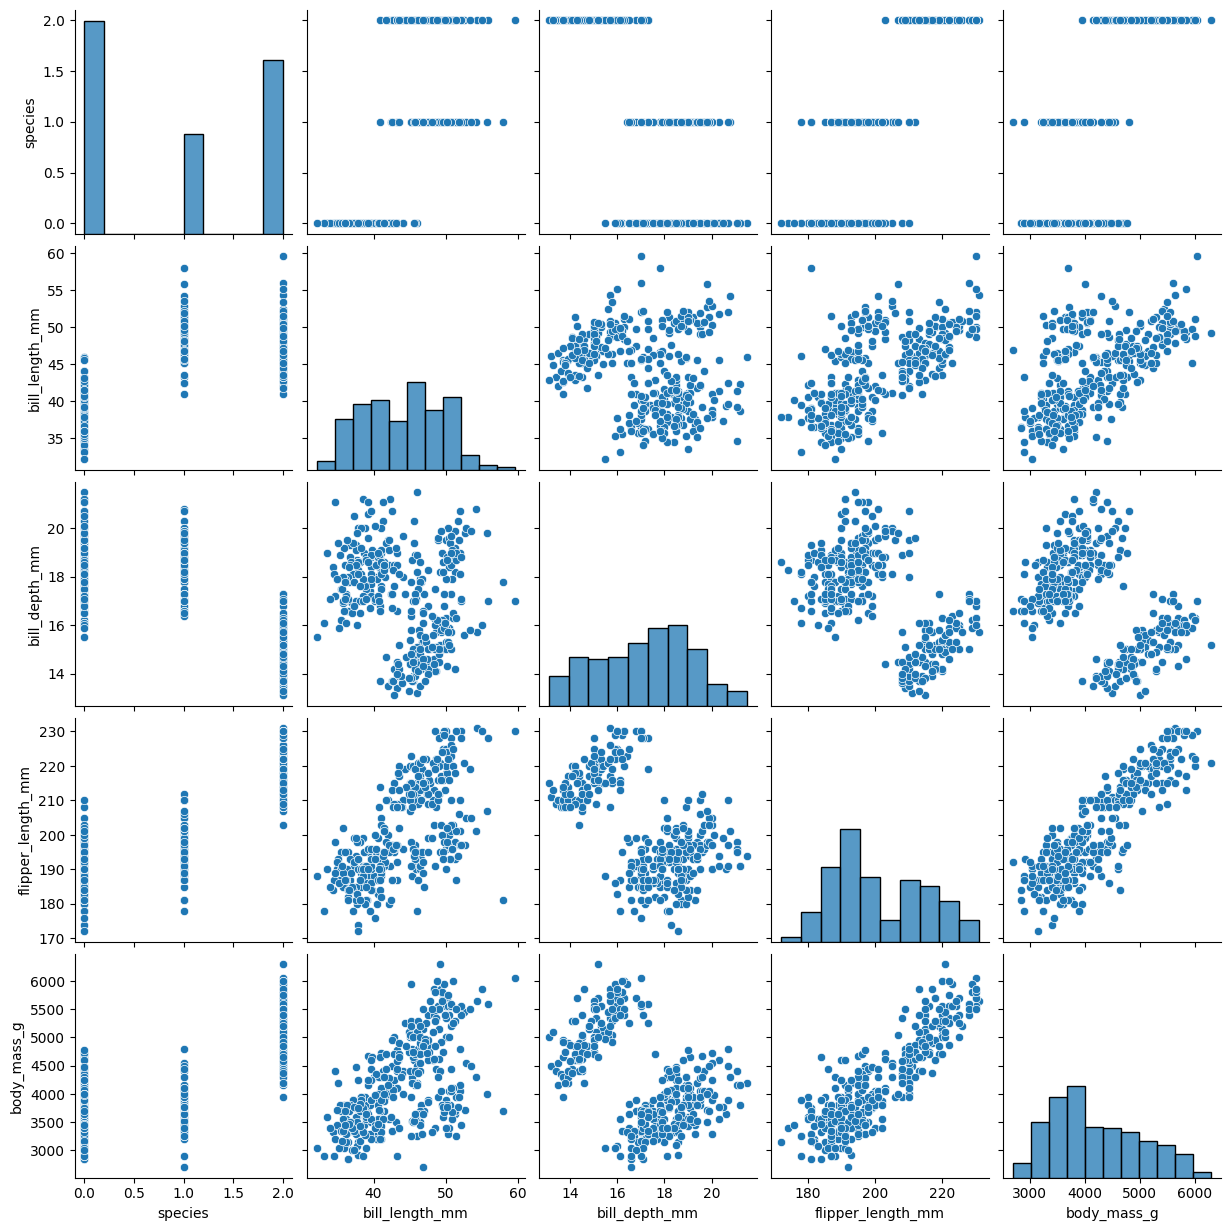

In [35]:
sns.pairplot(penguin_data)

In [17]:
# scale using the standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled =  scaler.fit_transform(penguin_data)
penguin_data_scaled = pd.DataFrame(scaled, columns=penguin_data.columns)

### Exercise

- Now try to cluster the penguins using your favorite clustering algorithm. 
- Can you recover the species from the clustering? Use the ARIscore to see how well your cluster labels match the species.
- Repeat some of the checks from above, such as doing an elbow plot to find the optimal number of clusters, computing the silhouette score. You may also want to play around with hierarchical clustering and GMMs.

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

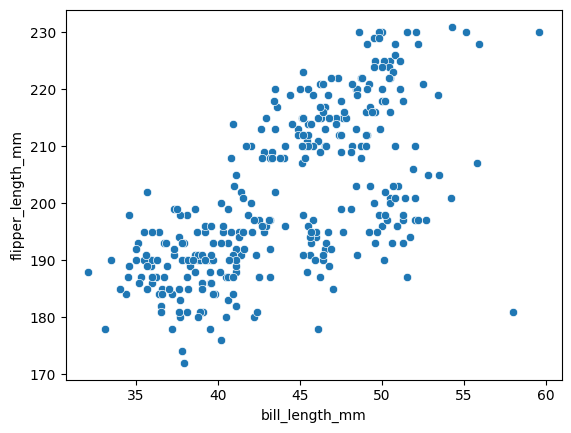

In [39]:
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", data=penguin_data)